# 데이터 입력

In [1]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# 전처리
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

# train, test 나누기
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/bank/bank-full.csv', sep =';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 전처리

## 종속변수 y를 수치형으로 바꿔주기. 
no를 0(정상)으로, yes를 1(이상)로 변환

In [3]:
df.loc[df['y'] == 'no', 'y'] = 0
df.loc[df['y'] == 'yes', 'y'] = 1
# object 타입을 int64 타입으로 바꿔주기
df['y'] = df['y'].astype('int64')

## unknown값 처리
사실상 Null값과 같다고 판단. 전처리 진행.

### unknown값 확인

In [4]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [5]:
288/45211

0.006370131162770122

In [6]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [7]:
1857/45211

0.04107407489327818

In [8]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [9]:
13020/45211

0.28798301298356593

In [10]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [11]:
36959/45211

0.8174780473778506

### unknown값 제거

poutcome은 너무 많아 열을 삭제하였음

In [12]:
df.drop('poutcome', axis=1, inplace = True) # poutcome 변수 삭제

In [13]:
df.loc[df['job'] == 'unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,0
216,47,unknown,married,unknown,no,28,no,no,unknown,5,may,338,2,-1,0,0
354,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,0
876,37,unknown,single,unknown,no,414,yes,no,unknown,7,may,131,1,-1,0,0
1072,29,unknown,single,primary,no,50,yes,no,unknown,7,may,50,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,unknown,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,1
44742,64,unknown,married,unknown,no,2799,no,no,telephone,9,sep,378,4,-1,0,0
44970,28,unknown,single,unknown,no,326,no,no,cellular,11,oct,450,1,231,1,1
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,0


In [14]:
unknowndr1 = df[df['job'].str.contains('unknown')].index
df.drop(unknowndr1, inplace=True)

In [15]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0


In [16]:
df.loc[df['job'] == 'unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y


In [17]:
45211-288

44923

unknown 없어짐을 확인.

In [18]:
df.loc[df['education'] == 'unknown'] #1857 -> 1730

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,0
16,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,0
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,0
44,58,retired,married,unknown,no,96,yes,no,unknown,5,may,616,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45098,44,technician,single,unknown,no,11115,no,no,cellular,25,oct,189,1,185,4,0
45109,78,management,married,unknown,no,1780,yes,no,cellular,25,oct,211,2,185,7,1
45129,46,technician,married,unknown,no,3308,no,no,cellular,27,oct,171,1,91,2,1
45150,65,management,married,unknown,no,2352,no,no,cellular,8,nov,354,3,188,13,0


In [19]:
unknowndr2 = df[df['education'].str.contains('unknown')].index
df.drop(unknowndr2, inplace=True)

In [20]:
df.loc[df['contact'] == 'unknown'] #13020 -> 12286

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,30,self-employed,single,secondary,no,1031,no,no,unknown,20,oct,7,1,-1,0,0
45062,58,retired,married,primary,no,742,no,no,unknown,20,oct,5,1,-1,0,0
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,unknown,26,oct,17,1,-1,0,0
45135,53,blue-collar,married,primary,no,1294,no,no,unknown,28,oct,71,1,-1,0,0


In [21]:
unknowndr3 = df[df['contact'].str.contains('unknown')].index
df.drop(unknowndr3, inplace=True)

In [22]:
df # 45211 -> 30907

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,0
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,0
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,0
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,0
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0


In [23]:
# dur0 = df.loc[df['duration'] <= 0].index
# df.drop(dur0, inplace=True)

In [24]:
# df.shape # (30905, 16)

In [25]:
# 3766 / 30905 * 100 #12.185730464326161

In [26]:
# bal0 = df.loc[df['balance'] < 0].index
# df.drop(bal0, inplace=True)

In [27]:
# df.shape #(28681, 16)

In [28]:
df.reset_index(drop=True, inplace = True) #인덱스 재 정렬
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,0
1,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,0
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,0
3,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,0
4,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,1
30903,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,1
30904,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1
30905,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0


In [29]:
# y 변수 저장
df_labels = df['y']

## 인코딩

### 범주형

#### Binary Encoding

In [30]:
!pip install category_encoders
import category_encoders as ce

df_bi_cat = df[['month', 'job']]
df1 = ce.BinaryEncoder(cols = ['month']).fit_transform(df_bi_cat)
df2 = ce.BinaryEncoder(cols = ['job']).fit_transform(df1)

In [31]:
df1

,month_0,month_1,month_2,month_3,job
0,0,0,0,1,management
1,0,0,0,1,blue-collar
2,0,0,0,1,blue-collar
3,0,0,0,1,technician
4,0,0,0,1,technician
...,...,...,...,...,...
30902,0,1,0,0,technician
30903,0,1,0,0,retired
30904,0,1,0,0,retired
30905,0,1,0,0,blue-collar


In [32]:
df2

,month_0,month_1,month_2,month_3,job_0,job_1,job_2,job_3
0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,1
4,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...
30902,0,1,0,0,0,0,1,1
30903,0,1,0,0,1,0,0,1
30904,0,1,0,0,1,0,0,1
30905,0,1,0,0,0,0,1,0


#### One Hot Encoding

In [33]:
df_one_cat = df[['marital', 'education', 'default','housing',
       'loan', 'contact']] # month와 job을 제외한 범주형 변수 원핫인코딩

In [34]:
cat_pipeline = Pipeline([
    ('1hot_encoder', OneHotEncoder(sparse=False)),
    ])
df_cat_tr = cat_pipeline.fit_transform(df_one_cat)

## Scaling

### 수치형

#### Robust Scaling

In [35]:
df_std_big_num = df[['balance', 'duration', 'pdays']] # 표준편차가 큰 수치형 변수

In [36]:
num_pipeline = Pipeline([
        ('rb_scaler', RobustScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_std_big_num)

In [37]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_std_big_num) #키들(컬럼명)만 list로 반환
cat_attribs = list(df_one_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


In [38]:
full_df = pd.DataFrame(full_pipeline.fit_transform(df))
full_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.307909,0.339450,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.004921,0.532110,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.258699,2.233945,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,-0.319156,-0.532110,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.243937,1.169725,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0.247452,3.651376,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
30903,0.882953,1.261468,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
30904,3.685062,4.339450,16.818182,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
30905,0.137083,1.500000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [39]:
print(full_df[0].skew(), full_df[0].kurt())
print(full_df[1].skew(), full_df[1].kurt())
print(full_df[2].skew(), full_df[2].kurt())

# 왜도와 첨도가 전에 비해 조금 나아졌음.

8.647045631212249 148.67540428544532
3.042065627005393 16.93209376033018
1.976061278452921 3.2989437717843884


In [40]:
df_oth = df[['age', 'day', 'campaign', 'previous']] # 나머지 수치형 변수들

In [41]:
X = pd.concat([full_df,df2,df_oth], axis =1)
X

,0,1,2,3,4,5,6,7,8,9,...,month_2,month_3,job_0,job_1,job_2,job_3,age,day,campaign,previous
0,-0.307909,0.339450,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,1,27,4,1,0
1,-0.004921,0.532110,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,1,0,54,4,1,0
2,-0.258699,2.233945,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,0,43,4,2,0
3,-0.319156,-0.532110,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,1,31,4,2,0
4,-0.243937,1.169725,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,1,27,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0.247452,3.651376,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,1,51,17,3,0
30903,0.882953,1.261468,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,1,71,17,2,0
30904,3.685062,4.339450,16.818182,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,1,72,17,5,3
30905,0.137083,1.500000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,57,17,4,0


In [42]:
data = pd.concat([full_df,df2,df_oth, df_labels], axis =1)
data

,0,1,2,3,4,5,6,7,8,9,...,month_3,job_0,job_1,job_2,job_3,age,day,campaign,previous,y
0,-0.307909,0.339450,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,27,4,1,0,0
1,-0.004921,0.532110,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,1,0,54,4,1,0,0
2,-0.258699,2.233945,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0,0,1,0,43,4,2,0,0
3,-0.319156,-0.532110,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,1,1,31,4,2,0,0
4,-0.243937,1.169725,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,1,1,27,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0.247452,3.651376,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,1,51,17,3,0,1
30903,0.882953,1.261468,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,1,71,17,2,0,1
30904,3.685062,4.339450,16.818182,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,72,17,5,3,1
30905,0.137083,1.500000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,1,0,57,17,4,0,0


In [43]:
data.columns

Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,         10,         11,
               12,         13,         14,         15,         16,  'month_0',
        'month_1',  'month_2',  'month_3',    'job_0',    'job_1',    'job_2',
          'job_3',      'age',      'day', 'campaign', 'previous',        'y'],
      dtype='object')

## Train, Test 나누기

In [44]:
df_labels.value_counts()

0    26394
1     4513
Name: y, dtype: int64

In [45]:
# 전체 중 0(정상)의 비율
26394 /(26394+4513) * 100

85.39812987349144

In [46]:
4513 / (26394+4513) * 100

14.60187012650856

85 대 15

## 정상/이상 구분

In [47]:
normal = data.loc[data['y'] == 0]
anomaly = data.loc[data['y'] == 1]

In [48]:
# 행 shuffle 후 위에서 4513개 --> test
normal_shuffled=normal.sample(frac=1).reset_index(drop=True) #전체 데이터의 shuffling
normal_shuffled_test = normal_shuffled[:4513]
normal_shuffled_train = normal_shuffled[4513:]

In [49]:
# train에 쓰이는 정상 데이터 X, Y 구분
X_train = normal_shuffled_train[normal_shuffled_train.columns.difference(['y'])]
Y_train = normal_shuffled_train["y"]
X_train.shape

(21881, 29)

In [50]:
# test에 쓰이는 정상 데이터 X, Y 구분 (샘플링)
X_normal_shuffled_test = normal_shuffled_test[normal_shuffled_test.columns.difference(['y'])]
Y_normal_shuffled_test = normal_shuffled_test["y"]
X_normal_shuffled_test.shape

(4513, 29)

In [51]:
# test에 쓰이는 이상 데이터 X, Y 구분
X_anomaly = anomaly[anomaly.columns.difference(['y'])]
y_anomaly = anomaly["y"]
X_anomaly.shape

(4513, 29)

In [52]:
X_test = pd.concat([X_normal_shuffled_test, X_anomaly])
Y_test = pd.concat([Y_normal_shuffled_test, y_anomaly])

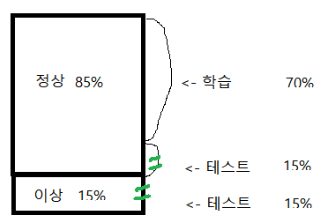

In [53]:
X_train.columns

Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,         10,         11,
               12,         13,         14,         15,         16,      'age',
       'campaign',      'day',    'job_0',    'job_1',    'job_2',    'job_3',
        'month_0',  'month_1',  'month_2',  'month_3', 'previous'],
      dtype='object')

## 수치형 변수 표준화

In [54]:
# 범주형 변수 따로 빼내기
cat_train = pd.concat([X_train.loc[:,3:16],X_train.loc[:,'job_0':'month_3']],axis=1)
cat_test = pd.concat([X_test.loc[:,3:16],X_test.loc[:,'job_0':'month_3']],axis=1)

In [55]:
# 수치형 변수만 표준화
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체 생성
scaler = StandardScaler()
scale_columns = [0,1,2,'age','campaign','day', 'previous']
scaler.fit(X_train[scale_columns])

# 학습 데이터 표준화
train_scaled = scaler.transform(X_train[scale_columns])
# 테스트 데이터 표준화
test_scaled = scaler.transform(X_test[scale_columns])

In [56]:
# 표준화된 학습 데이터를 DataFrame으로 변환
train_scaled_df = pd.DataFrame(train_scaled, columns=scale_columns)
# 표준화된 테스트 데이터를 DataFrame으로 변환
test_scaled_df = pd.DataFrame(test_scaled, columns=scale_columns)


train_scaled_df.reset_index(drop=True,inplace=True)
cat_train.reset_index(drop=True,inplace=True)
test_scaled_df.reset_index(drop=True,inplace=True)
cat_test.reset_index(drop=True,inplace=True)

# 범주형 변수와 표준화한 수치형 변수 합치기
X_train = pd.concat([train_scaled_df,cat_train],axis=1)
X_test = pd.concat([test_scaled_df,cat_test],axis=1)

In [57]:
X_train

,0,1,2,age,campaign,day,previous,3,4,5,...,15,16,job_0,job_1,job_2,job_3,month_0,month_1,month_2,month_3
0,-0.223394,1.094986,-0.482982,-0.842947,-0.278642,1.453851,-0.258002,0.0,1.0,0.0,...,1.0,0.0,0,0,1,1,0,0,0,1
1,-0.434344,-0.514709,-0.256332,-1.228044,-0.278642,-0.259292,0.451568,0.0,1.0,0.0,...,1.0,0.0,0,0,0,1,1,1,0,0
2,-0.435309,0.275680,-0.482982,1.275087,1.015075,1.453851,-0.258002,1.0,0.0,0.0,...,1.0,0.0,0,0,0,1,0,0,1,0
3,-1.104820,-0.461695,-0.482982,0.986265,1.015075,1.453851,-0.258002,0.0,1.0,0.0,...,1.0,0.0,0,1,1,1,0,0,0,1
4,0.335496,-0.606279,-0.482982,-0.457849,1.985363,1.086749,-0.258002,1.0,0.0,0.0,...,1.0,0.0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21876,0.617835,0.516652,-0.482982,-0.842947,0.368217,-0.626394,-0.258002,0.0,1.0,0.0,...,1.0,0.0,0,0,1,1,0,0,1,0
21877,0.000098,0.015430,-0.482982,-0.939221,-0.278642,0.107810,-0.258002,0.0,1.0,0.0,...,1.0,0.0,0,0,1,0,0,1,0,0
21878,-0.434344,-0.505070,-0.482982,1.178813,0.368217,1.698586,-0.258002,0.0,1.0,0.0,...,1.0,0.0,1,0,0,1,0,1,1,0
21879,0.140303,2.227555,-0.482982,-0.650398,-0.602071,0.719647,-0.258002,0.0,1.0,0.0,...,1.0,0.0,0,0,0,1,0,0,0,1


## CorrMat확인
변수 간 선형 상관성을 확인하였음.

In [58]:
from scipy.io import loadmat
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


import itertools
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns
sns.set_style('white')

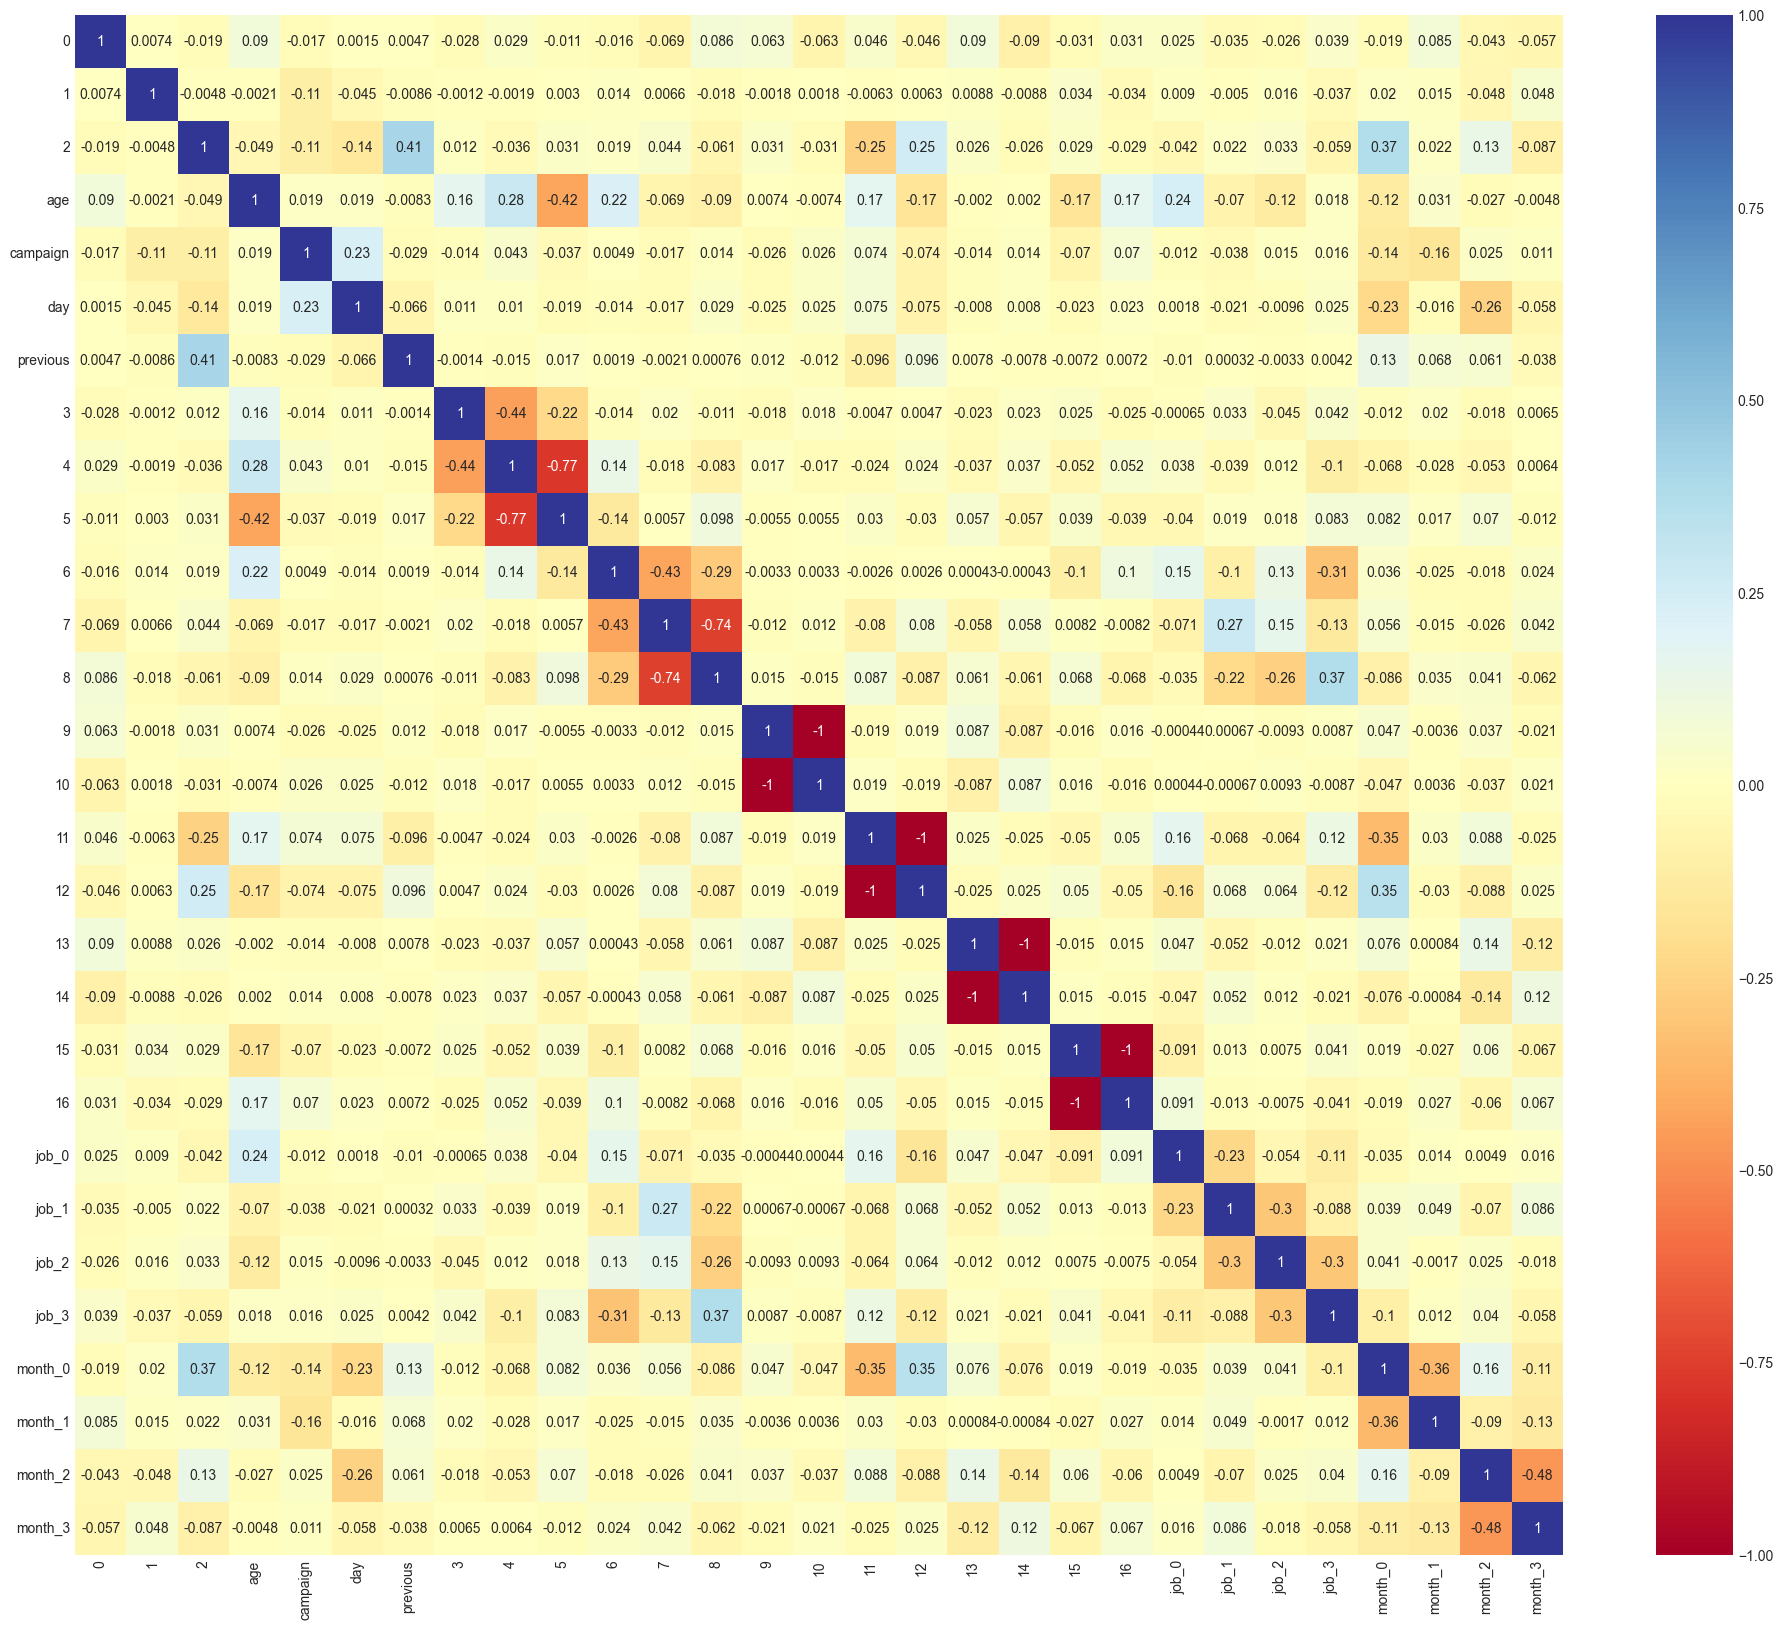

In [59]:
plt.figure(figsize=(24, 20))
sns.heatmap(X_train.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

3&4(-0.44)/ -> 3 제거

4&5(-0.77)/ -> 5 제거

6&7(-0.43)/ -> 7 제거

7&8(-0.74)/ -> 7 제거

9&10(-1)/ -> 9 제거

11&12(-1)/ -> 11 제거

13&14(-1)/ -> 13 제거

15&16(-1)/ -> 15 제거

month_0&month_1(-0.36)/ -> month_0 제거

month_2&month_3(-0.48)/ -> month_2 제거

5&age(-0.42)/ -> 5 제거

11&month_0(-0.35)/  -> 11 제거

12&month_0(0.35)/  -> month_0 제거

2&month_0(0.37)/ -> month_0 제거

2&previous(0.41)/

job_1&job_2(-0.3)/ 

job_2&job_3(-0.3)/ 

6&job_3(-0.31)/

8&job_3(0.37)/

(job_3랑 / job_2 / previous랑 2 중 하나) 추가로 빼주면 좋긴한데..

In [60]:
X_train.columns

Index([         0,          1,          2,      'age', 'campaign',      'day',
       'previous',          3,          4,          5,          6,          7,
                8,          9,         10,         11,         12,         13,
               14,         15,         16,    'job_0',    'job_1',    'job_2',
          'job_3',  'month_0',  'month_1',  'month_2',  'month_3'],
      dtype='object')

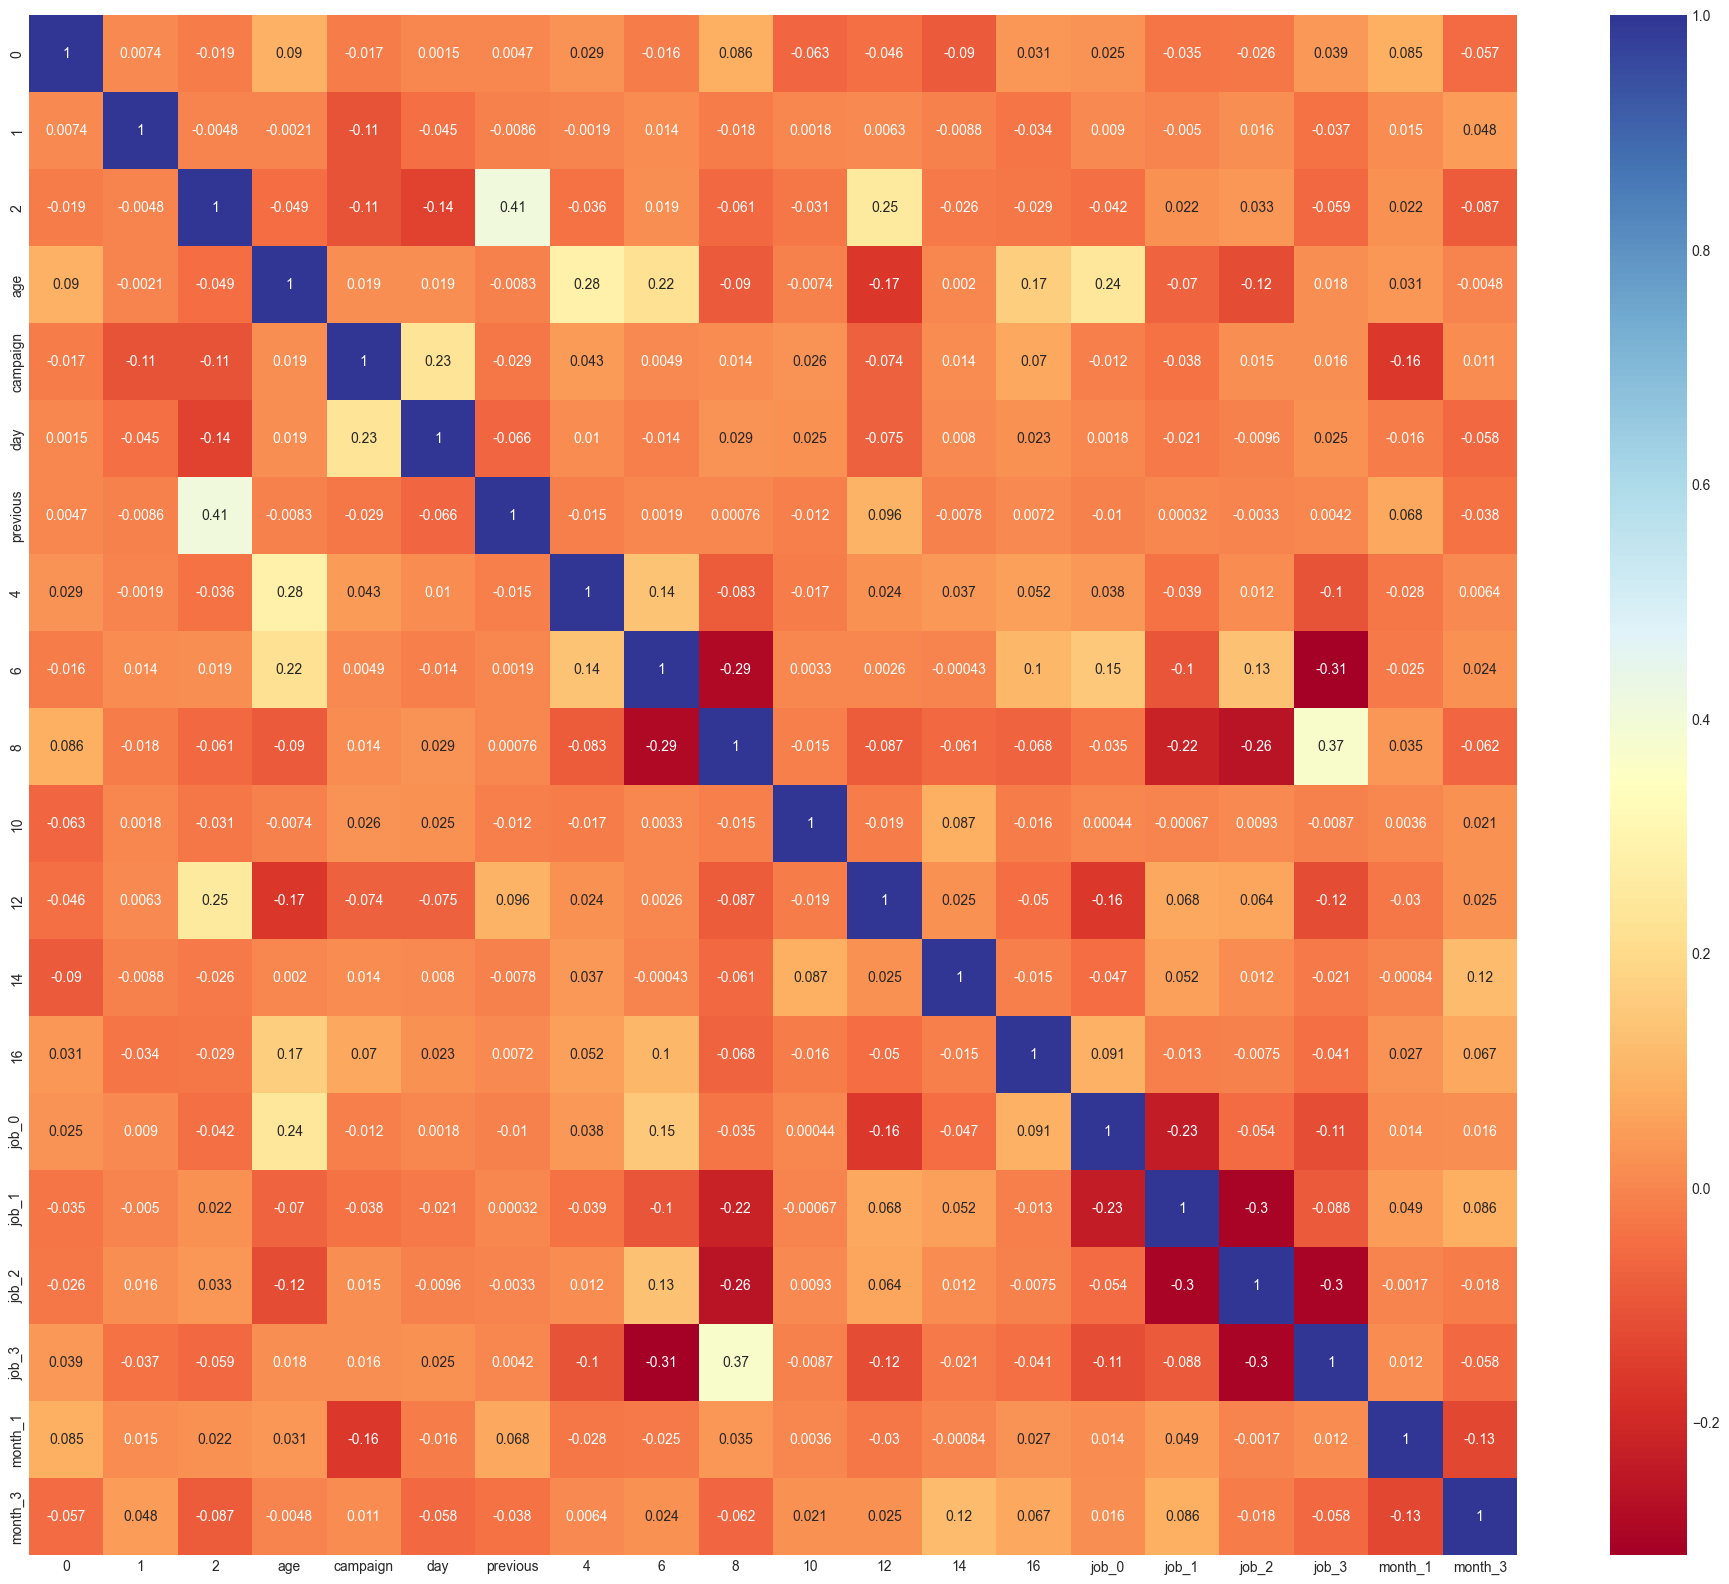

In [61]:
# 선형 상관성 존재하는 변수들 제거
X_train_lowcorr = X_train.drop([3, 5, 7, 9, 11, 13, 15, 'month_0', 'month_2'], axis=1)
plt.figure(figsize=(24, 20))
sns.heatmap(X_train_lowcorr.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

In [62]:
X_test_lowcorr = X_test.drop([3, 5, 7, 9, 11, 13, 15, 'month_0', 'month_2'], axis=1)
X_test_lowcorr

,0,1,2,age,campaign,day,previous,4,6,8,10,12,14,16,job_0,job_1,job_2,job_3,month_1,month_3
0,-0.261661,-0.697848,-0.482982,0.216070,-0.602071,1.698586,-0.258002,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1,1,0
1,-0.435309,0.482916,-0.482982,-1.420592,-0.602071,-1.360598,-0.258002,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,1,0,0,0
2,0.155417,-0.008668,-0.482982,1.082539,-0.602071,0.597280,-0.258002,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,0
3,-0.397364,-0.230362,-0.482982,-0.650398,0.044787,0.107810,-0.258002,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,0,0,1,0,1
4,-0.253943,-0.630376,-0.482982,0.312345,-0.278642,-0.381659,-0.258002,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,0.481168,0.391346,-0.111276,3.104299,-0.602071,0.107810,2.580279,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0
9022,-0.272916,0.805819,-0.482982,-1.516867,-0.278642,0.107810,-0.258002,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,1,1,0
9023,-0.170013,3.654111,-0.482982,0.986265,0.044787,0.107810,-0.258002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,1,1,0
9024,0.120687,1.143180,-0.482982,2.911750,-0.278642,0.107810,-0.258002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0


# GDE 적용

## 적용 전 데이터 분포 확인
원래 EDA 파트여야 함(...)

In [53]:
X_data = pd.concat([X_train_lowcorr, X_test_lowcorr]).reset_index(drop=True)
X_data

,0,1,2,4,6,8,10,12,14,16,age,campaign,day,job_0,job_1,job_2,job_3,month_1,month_3,previous
0,-0.329701,-0.678899,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,34,39,31,0,0,0,1,0,1,0
1,0.132865,-0.614679,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27,1,30,0,1,0,1,0,1,0
2,-0.326889,3.885321,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,2,29,0,0,1,1,0,0,0
3,-0.324077,1.334862,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,41,3,28,1,0,0,0,0,1,0
4,-0.331810,0.311927,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,40,3,22,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,1.671002,0.545872,3.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73,1,17,1,0,0,1,1,0,8
30903,0.022496,0.940367,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25,2,17,0,0,1,1,1,0,0
30904,0.247452,3.651376,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,51,3,17,0,0,1,1,1,0,0
30905,0.882953,1.261468,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,71,2,17,1,0,0,1,1,0,0


In [54]:
X_data.columns

Index([         0,          1,          2,          4,          6,          8,
               10,         12,         14,         16,      'age', 'campaign',
            'day',    'job_0',    'job_1',    'job_2',    'job_3',  'month_1',
        'month_3', 'previous'],
      dtype='object')

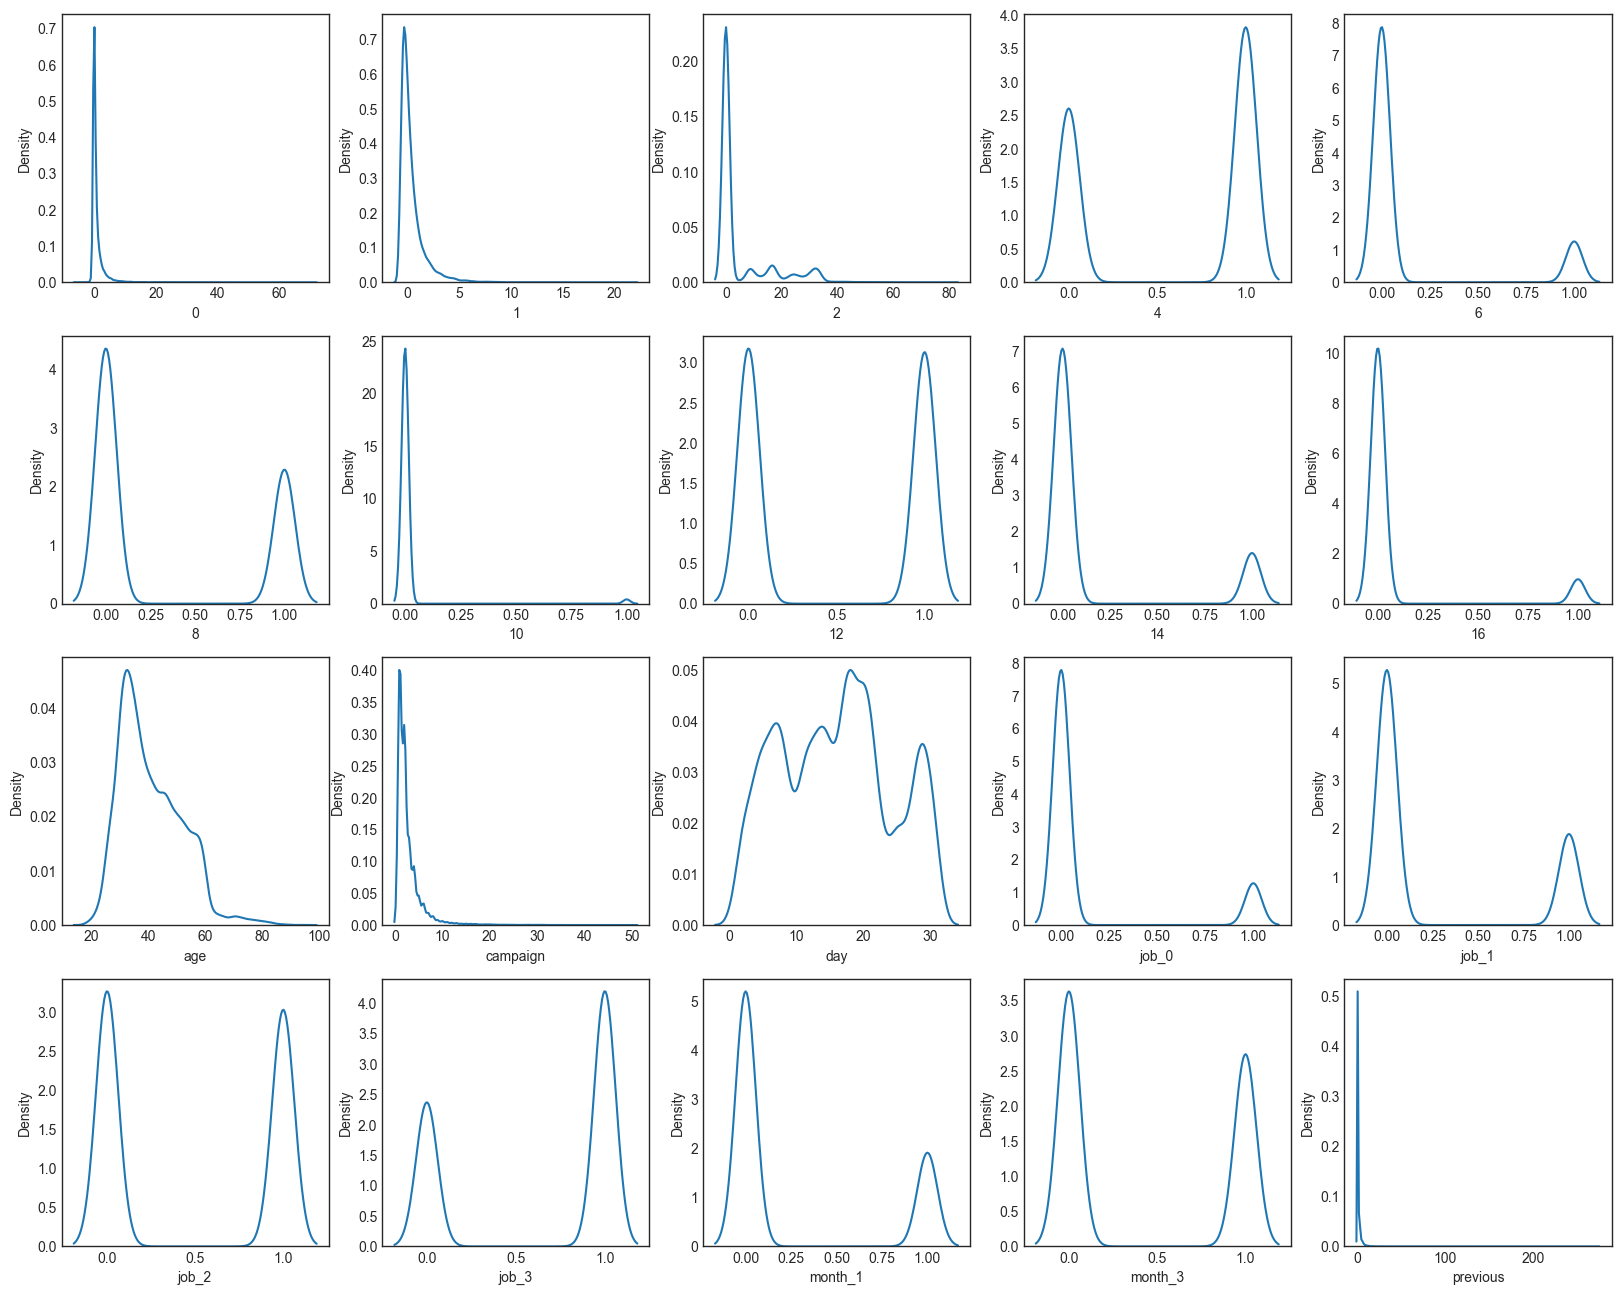

In [55]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,16))

i = 0
j = 0

for column in X_data.columns:
  sns.kdeplot(X_data[column], ax=ax[j,i])
  if i/4 < 1:
    i += 1
  else:
    j += 1
    i = 0

GDE는 애초에 single gaussian distribution을 따른다는 가정이 있어야 하므로, 높은 적합도를 보일 것 같지 않음.

In [ ]:
# gaussian 분포를 이용해 Outlier를 검출 모델
gde = EllipticEnvelope()
# 모델 fit
gde.fit(X_train_lowcorr)

EllipticEnvelope()

In [ ]:
# FRR, FAR, F1 score 도출
def calculate_metric(y_true, y_pred):
    con_mat = confusion_matrix(y_true, y_pred, labels=[1, 0])
    tp, fn, fp, tn = con_mat.ravel()
    
    frr = fp / (fp + tn) # 정상인 걸 얼마나 틀렸나 #FPR 같은
    far = fn / (fn + tp) # 비정상인 걸 얼마나 틀렸는 지 # FNR 같은
    
    f1 = f1_score(y_true, y_pred)
    
    return frr, far, f1

## train data에 대해 실험

In [ ]:
# train data에 대한 예측 값(정상 = 1, 이상 = -1)
GDE_train_pred = pd.DataFrame(gde.predict(pd.concat([X_train_lowcorr, X_test_lowcorr])))
GDE_train_pred = GDE_train_pred.replace({-1: 1, 1: 0})
GDE_train_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
30902,1
30903,0
30904,0
30905,0


Text(0.5, 18.5, 'Predicted')

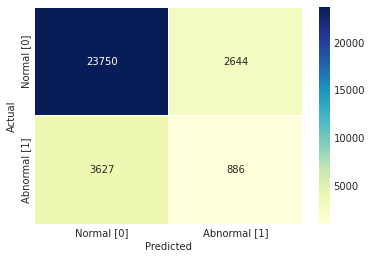

In [ ]:
# Confusion matrix 출력
con_mat = confusion_matrix(pd.concat([Y_train, Y_test]), GDE_train_pred)
sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu") 
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
frr, far, f1 = calculate_metric(pd.concat([Y_train, Y_test]), GDE_train_pred)

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.1002  |  FAR: 0.8037  |  F1 Score: 0.2203


## test data에 대해 실험

In [ ]:
# test data에 대한 예측 값(정상=1, 이상=-1)
GDE_test_pred = gde.predict(X_test_lowcorr) 
GDE_test_pred = pd.DataFrame(GDE_test_pred)
GDE_test_pred = GDE_test_pred.replace({-1: 1, 1: 0})
GDE_test_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
9021,1
9022,0
9023,0
9024,0


In [ ]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(Y_test, GDE_test_pred)
con_mat

array([[4057,  456],
       [3627,  886]])

Text(0.5, 18.5, 'Predicted')

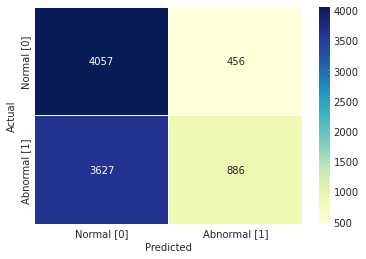

In [ ]:
sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu") 
#annot=True 은 각각의 셀에 값 표기
#fmt="d" 은 셀 데이터 타입이 정수형이므로(소수 두번째 자리까지 나타내고 싶으면 .2f)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
frr, far, f1 = calculate_metric(Y_test, GDE_test_pred)

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.101  |  FAR: 0.8037  |  F1 Score: 0.3026


인공지능응용_실습 GDE에서의 F1 보다는 성능 좋다....